In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from p2ch14.dsets import getCandidateInfoList, getCt, LunaDataset
from util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(require_on_disk=False)
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))

In [3]:
from p2ch14.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2024-12-06 11:02:48,039 INFO     pid:42476 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000001E27F3DDDB0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
5 CandidateInfoTuple(isNodule_bool=True, dia

In [4]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for _, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmentation_dict=all_dict)

augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)

2024-12-06 11:02:48,138 INFO     pid:42476 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000001E23133BE50>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-12-06 11:02:48,200 INFO     pid:42476 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000001E231338EB0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-12-06 11:02:48,264 INFO     pid:42476 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000001E231338EE0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-12-06 11:02:48,333 INFO     pid:42476 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000001E2313386A0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-12-06 11:02:48,400 INFO     pid:42476 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000001E2313390F0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-12-06 11:02:48,462 INFO     pid:42476 p2ch14.

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845', tensor([110, 355, 189]))
torch.Size([48, 48])


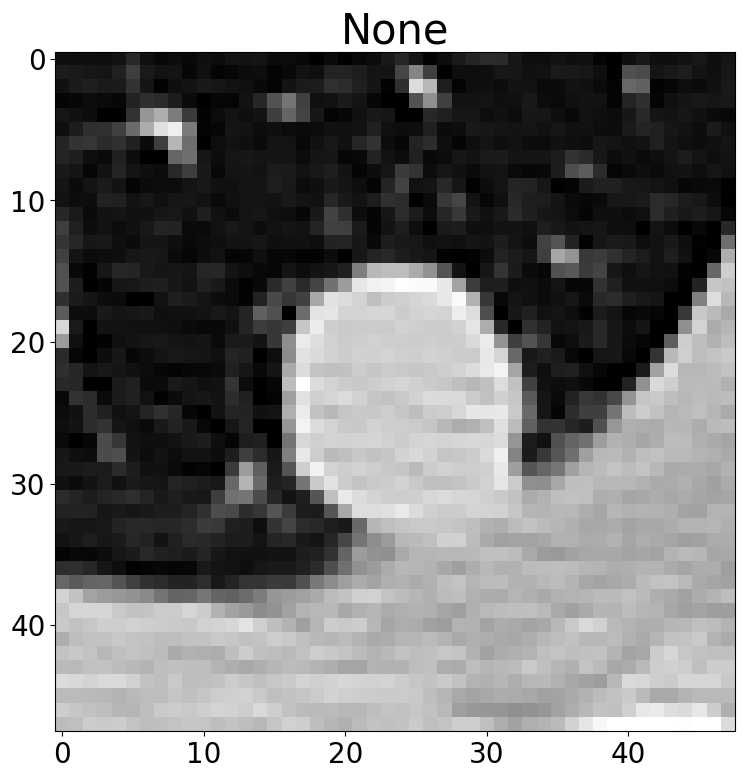

In [5]:
sample_ndx = 100
sample_ndx = 154
sample_ndx = 155

sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    print(sample_tup[0][0][16].shape)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')
    break

2024-12-06 11:02:49,111 INFO     pid:42476 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000001E23133BD60>: 911 training samples, 904 neg, 7 pos, unbalanced ratio


1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800
1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800 91 False [91, 92, 105, 175, 234, 481, 671]


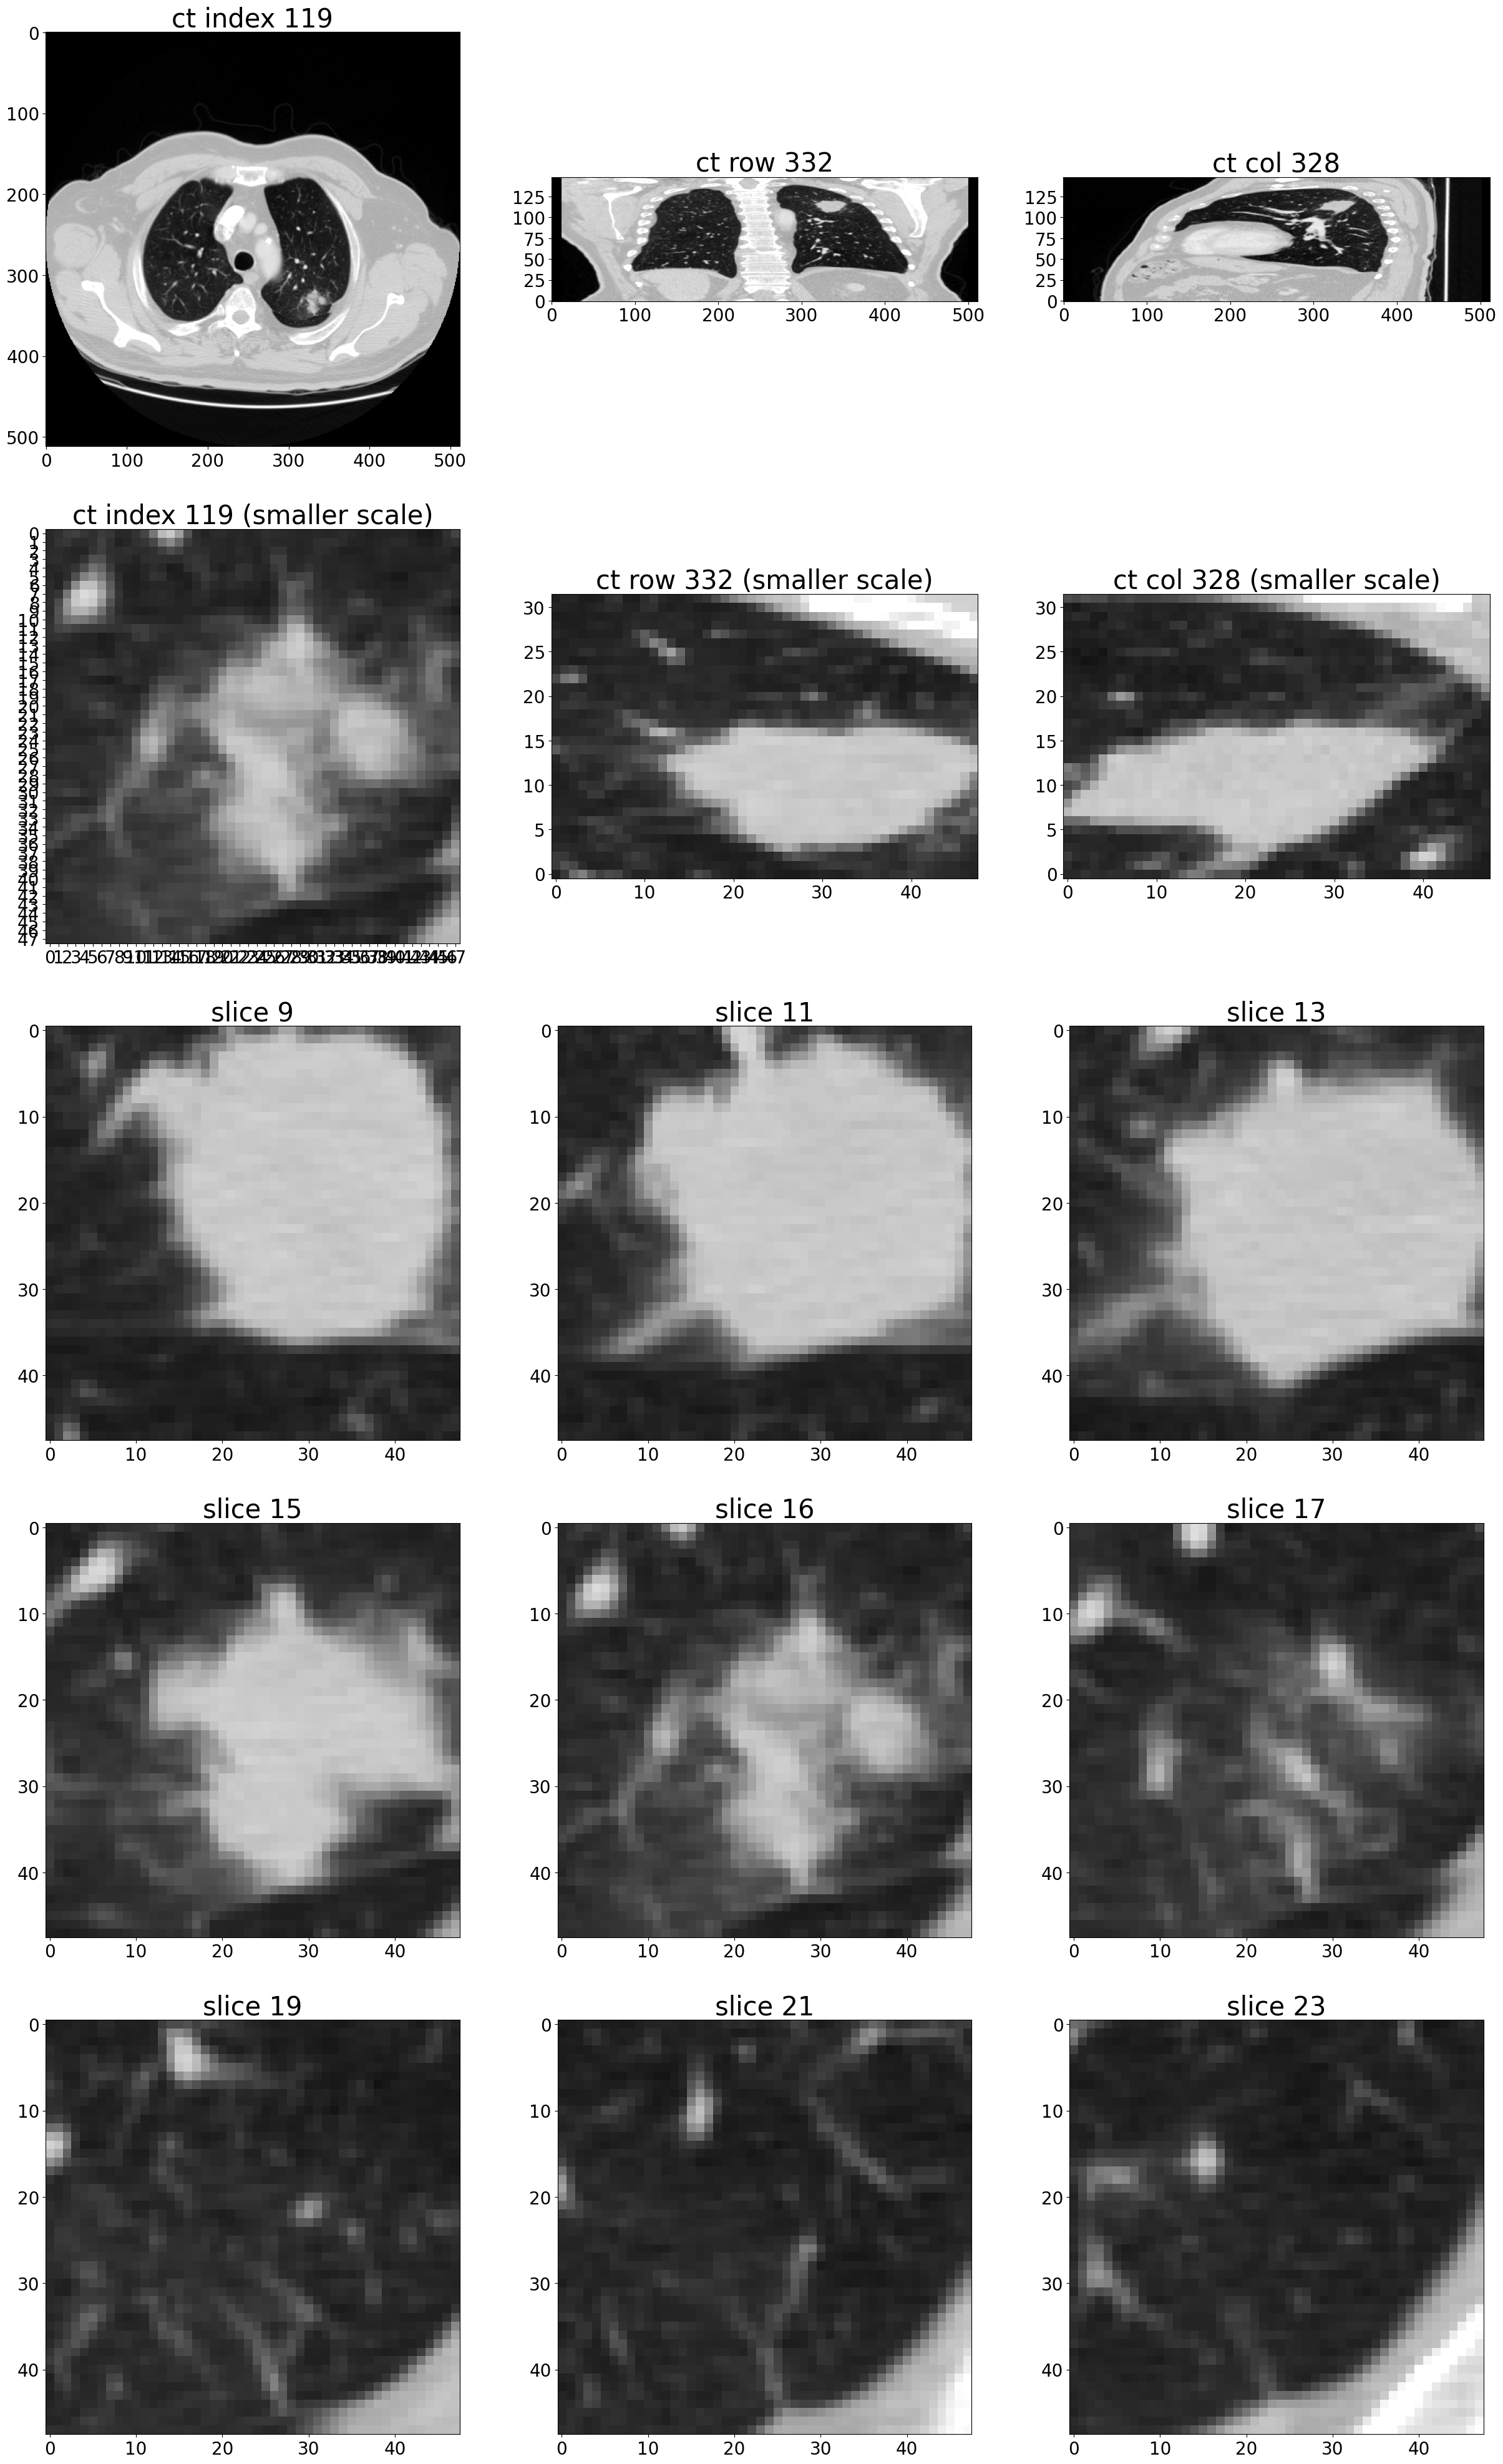

: 

In [ ]:
series_uid = positiveSample_list[1][2]
print(series_uid)
showCandidate(series_uid)